In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('global_education_data.csv', encoding='latin1')
df.sample(5)

,Countries and areas,Latitude,Longitude,OOSR_Pre0Primary_Age_Male,OOSR_Pre0Primary_Age_Female,OOSR_Primary_Age_Male,OOSR_Primary_Age_Female,OOSR_Lower_Secondary_Age_Male,OOSR_Lower_Secondary_Age_Female,OOSR_Upper_Secondary_Age_Male,...,Primary_End_Proficiency_Reading,Primary_End_Proficiency_Math,Lower_Secondary_End_Proficiency_Reading,Lower_Secondary_End_Proficiency_Math,Youth_15_24_Literacy_Rate_Male,Youth_15_24_Literacy_Rate_Female,Birth_Rate,Gross_Primary_Education_Enrollment,Gross_Tertiary_Education_Enrollment,Unemployment_Rate
194,Uruguay,32.522779,55.765835,2,1,3,3,1,0,15,...,59,68,58,49,99,99,13.86,108.5,63.1,8.73
197,Venezuela,6.423750,66.589730,14,14,10,10,15,13,28,...,0,0,0,0,0,0,17.88,97.2,79.3,8.80
148,Russia,61.524010,105.318756,9,10,1,0,2,1,3,...,99,89,78,78,100,100,11.50,102.6,81.9,4.59
116,Monaco,43.738418,7.424616,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5.90,0.0,0.0,0.00
12,The Bahamas,25.034280,77.396280,0,0,0,0,23,21,29,...,0,0,0,0,0,0,13.97,81.4,15.1,10.36


In [5]:
df.shape

(202, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Countries and areas                      202 non-null    object 
 1   Latitude                                 202 non-null    float64
 2   Longitude                                202 non-null    float64
 3   OOSR_Pre0Primary_Age_Male                202 non-null    int64  
 4   OOSR_Pre0Primary_Age_Female              202 non-null    int64  
 5   OOSR_Primary_Age_Male                    202 non-null    int64  
 6   OOSR_Primary_Age_Female                  202 non-null    int64  
 7   OOSR_Lower_Secondary_Age_Male            202 non-null    int64  
 8   OOSR_Lower_Secondary_Age_Female          202 non-null    int64  
 9   OOSR_Upper_Secondary_Age_Male            202 non-null    int64  
 10  OOSR_Upper_Secondary_Age_Female          202 non-n

# Data Cleaning

In [7]:
df.drop_duplicates(inplace=True)
df.shape

(202, 29)

In [8]:
pd.isnull(df).sum()

Countries and areas                        0
Latitude                                   0
Longitude                                  0
OOSR_Pre0Primary_Age_Male                  0
OOSR_Pre0Primary_Age_Female                0
OOSR_Primary_Age_Male                      0
OOSR_Primary_Age_Female                    0
OOSR_Lower_Secondary_Age_Male              0
OOSR_Lower_Secondary_Age_Female            0
OOSR_Upper_Secondary_Age_Male              0
OOSR_Upper_Secondary_Age_Female            0
Completion_Rate_Primary_Male               0
Completion_Rate_Primary_Female             0
Completion_Rate_Lower_Secondary_Male       0
Completion_Rate_Lower_Secondary_Female     0
Completion_Rate_Upper_Secondary_Male       0
Completion_Rate_Upper_Secondary_Female     0
Grade_2_3_Proficiency_Reading              0
Grade_2_3_Proficiency_Math                 0
Primary_End_Proficiency_Reading            0
Primary_End_Proficiency_Math               0
Lower_Secondary_End_Proficiency_Reading    0
Lower_Seco

Hence it can be concluded that the data is clean and now can be worked with to make visualizations & derive insights.

# 10 countries with the highest birth rate

                  Countries and areas  Birth_Rate
129                             Niger       46.08
35                               Chad       42.17
165                           Somalia       41.75
109                              Mali       41.54
49   Democratic Republic of the Congo       41.18
4                              Angola       40.73
29                            Burundi       39.01
66                         The Gambia       38.54
188                            Uganda       38.14
28                       Burkina Faso       37.93


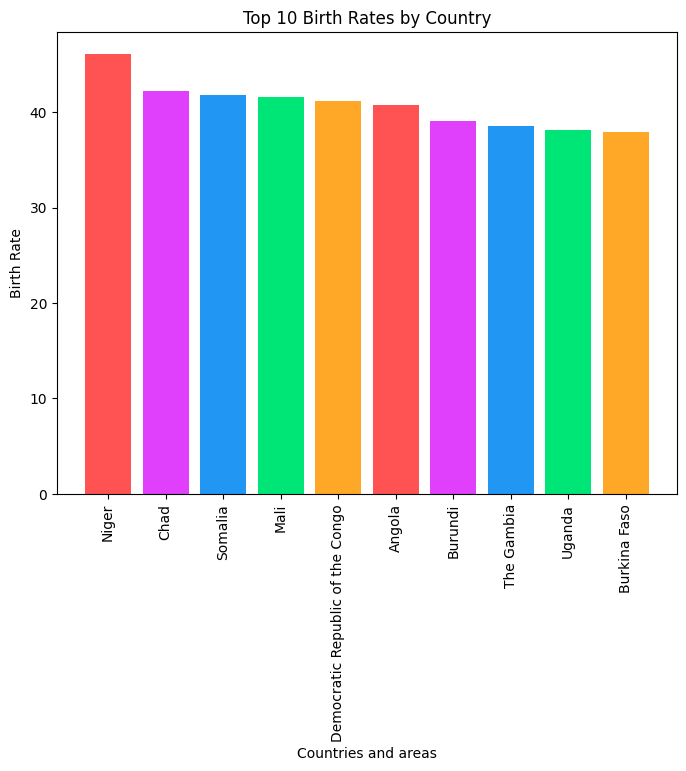

In [7]:
top_10_birth_rates = data.nlargest(10, 'Birth_Rate')[['Countries and areas', 'Birth_Rate']]
print(top_10_birth_rates)

plt.figure(figsize=(8, 6))

plt.bar(top_10_birth_rates['Countries and areas'], top_10_birth_rates['Birth_Rate'],color=['#FF5252', '#E040FB', '#2196F3', '#00E676', '#FFA726'])

plt.xlabel('Countries and areas')
plt.ylabel('Birth Rate')
plt.title('Top 10 Birth Rates by Country')
plt.xticks(rotation=90)
plt.show()

# 10 countries with the lowest birth rates

        Countries and areas  Birth_Rate
116                  Monaco        5.90
145             South Korea        6.40
154              San Marino        6.80
3                   Andorra        7.20
87                    Italy        7.30
89                    Japan        7.40
168                   Spain        7.90
70                   Greece        8.10
22   Bosnia and Herzegovina        8.11
143                Portugal        8.50


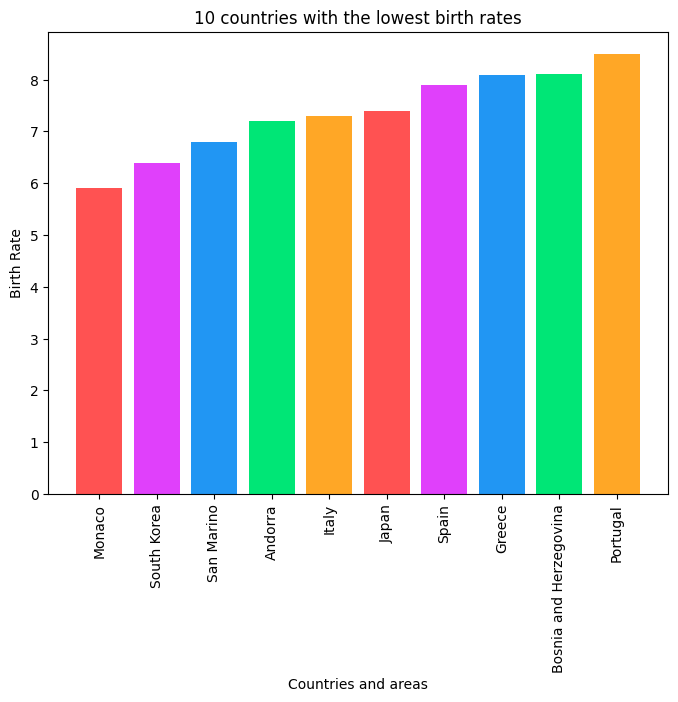

In [8]:
top_10_lowest_birth_rates = data[data['Birth_Rate'] != 0.0].nsmallest(10, 'Birth_Rate')[['Countries and areas', 'Birth_Rate']]
print(top_10_lowest_birth_rates)

plt.figure(figsize=(8, 6))

plt.bar(top_10_lowest_birth_rates['Countries and areas'], top_10_lowest_birth_rates['Birth_Rate'], color=['#FF5252', '#E040FB', '#2196F3', '#00E676', '#FFA726'])

plt.xlabel('Countries and areas')
plt.ylabel('Birth Rate')
plt.title('10 countries with the lowest birth rates')
plt.xticks(rotation=90)
plt.show()

# Highest unemployment rates by countries

                  Countries and areas  Unemployment_Rate
166                      South Africa              28.18
99                            Lesotho              23.41
151                       Saint Lucia              20.71
123                           Namibia              20.27
65                              Gabon              20.00
152  Saint Vincent and the Grenadines              18.88
101                             Libya              18.56
22             Bosnia and Herzegovina              18.42
23                           Botswana              18.19
70                             Greece              17.24


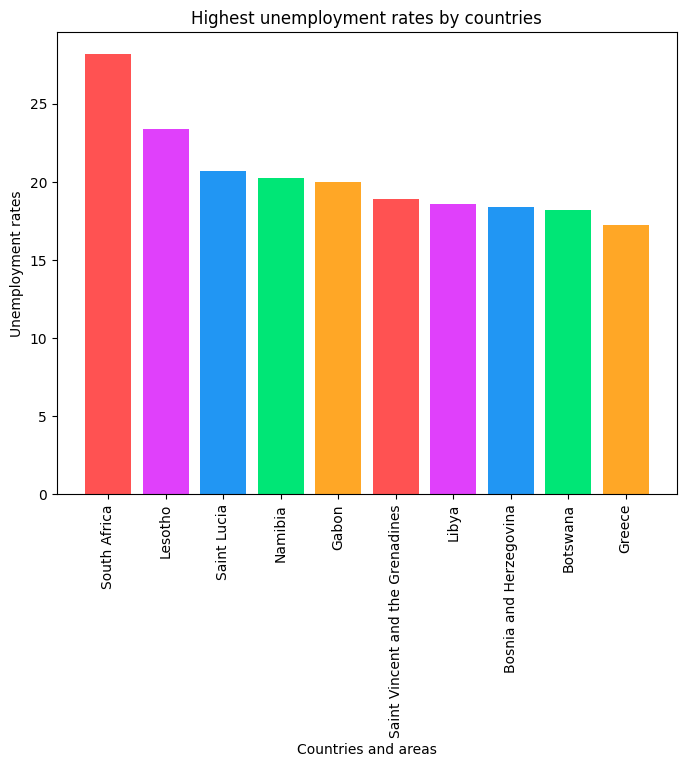

In [9]:
highest_unemployment_rate = data.nlargest(10, 'Unemployment_Rate')[['Countries and areas', 'Unemployment_Rate']]
print(highest_unemployment_rate)

plt.figure(figsize=(8, 6))

plt.bar(highest_unemployment_rate['Countries and areas'], highest_unemployment_rate['Unemployment_Rate'], color=['#FF5252', '#E040FB', '#2196F3', '#00E676', '#FFA726'])

plt.xlabel('Countries and areas')
plt.ylabel('Unemployment rates')
plt.title('Highest unemployment rates by countries')
plt.xticks(rotation=90)
plt.show()

# Average out-of-school rate for primary age by Gender


Average out-of-school rate for primary age males: 5.282178217821782
Average out-of-school rate for primary age males: 5.569306930693069


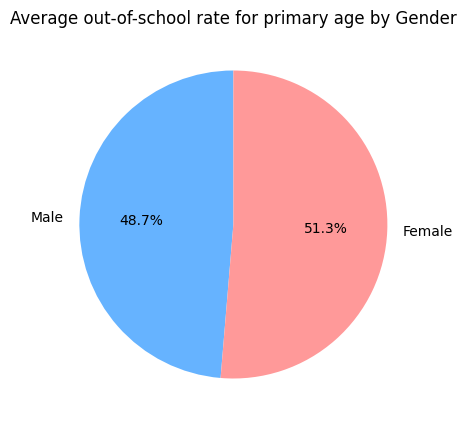

In [10]:
# oosr = out of school rate
average_oosr_primary_male = data['OOSR_Primary_Age_Male'].mean()
average_oosr_primary_female = data['OOSR_Primary_Age_Female'].mean()

print("\nAverage out-of-school rate for primary age males:", average_oosr_primary_male)
print("Average out-of-school rate for primary age males:", average_oosr_primary_female)

labels = ['Male', 'Female']
sizes = [average_oosr_primary_male, average_oosr_primary_female]
colors = ['#66b3ff','#ff9999']
 
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Average out-of-school rate for primary age by Gender')
plt.show()

# Highest proficiency in reading at the end of primary education.

In [11]:
pir = data.nlargest(10, 'Primary_End_Proficiency_Reading')
pir[['Countries and areas', "Primary_End_Proficiency_Reading"]]

,Countries and areas,Primary_End_Proficiency_Reading
148,Russia,99
10,Austria,98
91,Kazakhstan,98
79,Hungary,97
103,Lithuania,97
27,Bulgaria,95
68,Germany,95
64,France,94
162,Slovakia,93
113,Mauritius,88


# Lowest proficiency in reading at the end of primary education.

In [12]:
lpir = data[data['Primary_End_Proficiency_Reading'] > 0].nsmallest(10, 'Primary_End_Proficiency_Reading')
lpir[['Countries and areas', "Primary_End_Proficiency_Reading"]]

,Countries and areas,Primary_End_Proficiency_Reading
129,Niger,2
35,Chad,3
105,Madagascar,4
29,Burundi,7
0,Afghanistan,13
179,Togo,16
40,Republic of the Congo,17
28,Burkina Faso,21
53,Dominican Republic,21
43,Ivory Coast,22


# Relation between literacy rate among male and female youths aged 15-24.

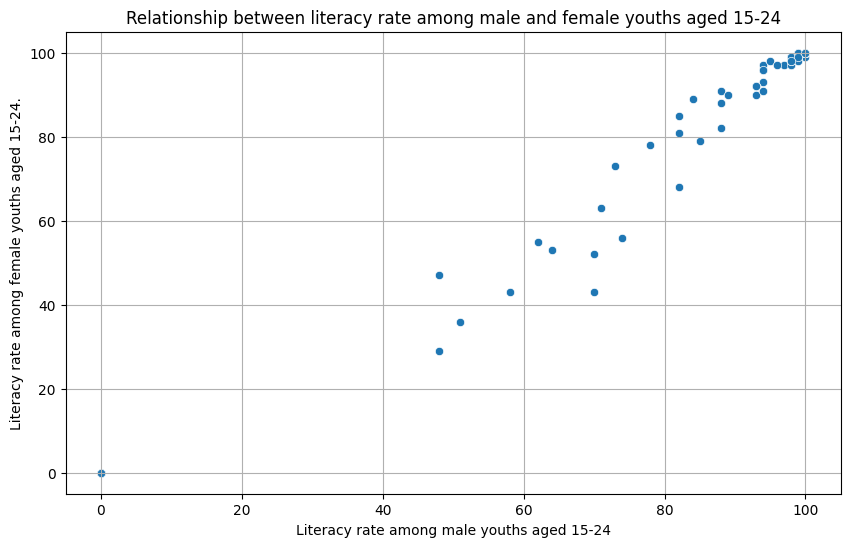

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Youth_15_24_Literacy_Rate_Male', y='Youth_15_24_Literacy_Rate_Female', data=data)
plt.title('Relationship between literacy rate among male and female youths aged 15-24')
plt.xlabel('Literacy rate among male youths aged 15-24')
plt.ylabel('Literacy rate among female youths aged 15-24.')
plt.grid(True) 
plt.show()

# Relation between completion rate for primary education among males and proficiency in reading at the end of primary education

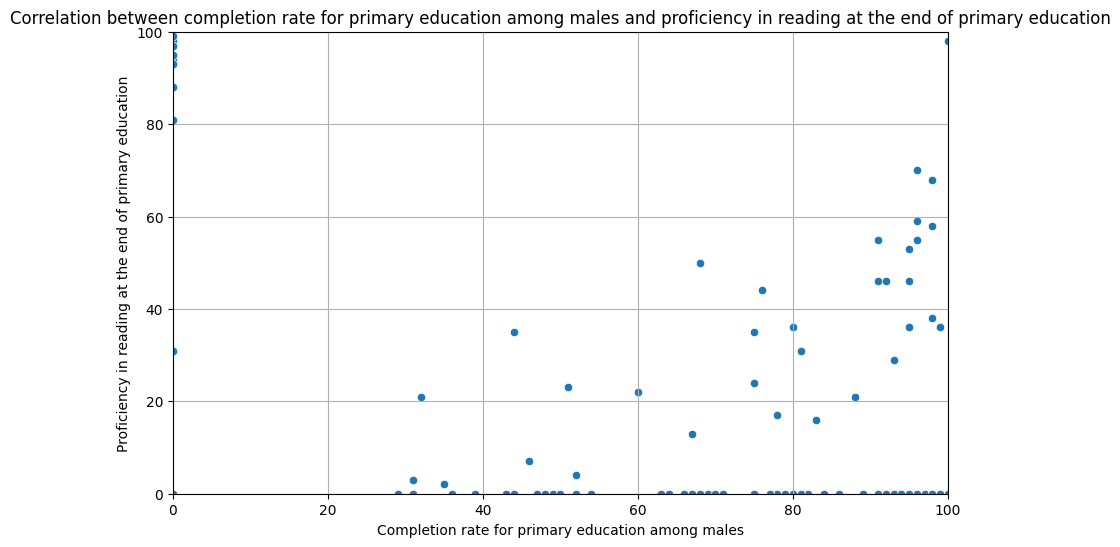

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Completion_Rate_Primary_Male',
    y='Primary_End_Proficiency_Reading',
    data=data,
)
plt.title('Correlation between completion rate for primary education among males and proficiency in reading at the end of primary education')
plt.xlabel('Completion rate for primary education among males')
plt.ylabel('Proficiency in reading at the end of primary education')
plt.xlim(0, 100)
plt.ylim(0, 100) 
plt.grid(True) 

plt.show()

# Relation between completion rate for primary education among females and proficiency in reading at the end of primary education

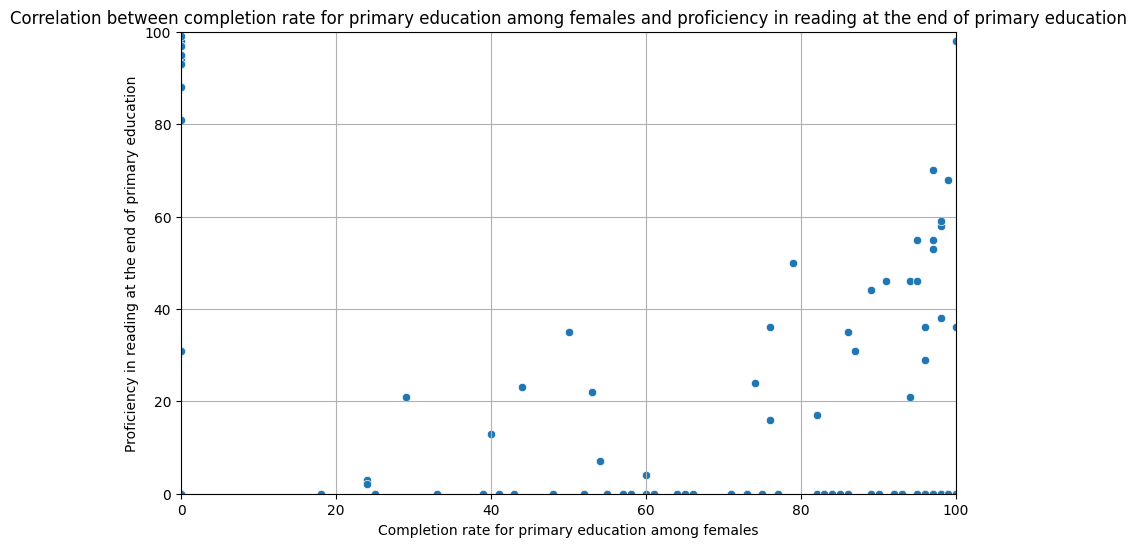

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Completion_Rate_Primary_Female',
    y='Primary_End_Proficiency_Reading',
    data=data,
)
plt.title('Correlation between completion rate for primary education among females and proficiency in reading at the end of primary education')
plt.xlabel('Completion rate for primary education among females')
plt.ylabel('Proficiency in reading at the end of primary education')
plt.xlim(0, 100)
plt.ylim(0, 100) 
plt.grid(True) 

plt.show()

**Insights derived from this data:**
1. Niger, Chad and Somalia have the highest birth rates in the world.
2. Monaco, South Korea and San Marino have the lowest birth rates in the world.
3. South Africa, Lesotho and Saint Lucia are the countries with the highest unemployment rates.
4. On average, 49% of males and 51% of females in the world are not enrolled in pre-primary, primary, secondary, or higher levels of education.
5. Students from Russia, Austria and Kazakhstan have the highest reading proficiency rate at the end of their primary education.
6. Students from Niger, Chad & Madagascar have the lowest reading proficiency rate at the end of their primary education.
7. There is a strong positive correlation between male and female literacy rates among youths aged 15-24, suggesting that regions with higher male literacy also tend to have higher female literacy.
8. There is a weak or inconsistent correlation between female primary education completion rates and reading proficiency, suggesting that simply completing primary education does not always translate to strong reading skills for women.

### **Educational Policy Recommendations:**  

1. **Increase Access to Education in High Birth Rate Countries**  
   - Implement **universal primary education** in **Niger, Chad, and Somalia** to manage population growth through awareness and better opportunities.  

2. **Strengthen Early Education Enrollment**  
   - With **49% of males and 51% of females** not enrolled in any education level, governments should introduce **subsidies, awareness campaigns, and community-based programs** to boost enrollment.  

3. **Address Unemployment through Vocational Training**  
   - In **South Africa, Lesotho, and Saint Lucia**, integrate **skills-based training** in the school curriculum to improve employability.  

4. **Improve Reading Proficiency in Low-Performing Countries**  
   - In **Niger, Chad, and Madagascar**, focus on **teacher training, improved learning materials, and literacy programs** to enhance early reading skills.  

5. **Ensure Literacy Equality for Both Genders**  
   - Since **male and female literacy rates are strongly correlated**, promoting **gender-inclusive policies** can help balance literacy levels in both genders.  

6. **Go Beyond Primary Education for Reading Skills**  
   - Since **completing primary education doesn’t guarantee reading proficiency**, introduce **reading intervention programs** and **continuous skill assessments** to improve outcomes for young students, especially girls.